In [10]:
import pandas as pd 
from math import * 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as st 
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [13]:
df = pd.read_csv("diabetes.csv") 

In [14]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [17]:
# df['Outcome'] = df['Outcome'].astype(str)

In [18]:
# df.dtypes

In [19]:
x = df.drop(columns=["Outcome"]) 
y = df["Outcome"] 

In [20]:
 X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) 

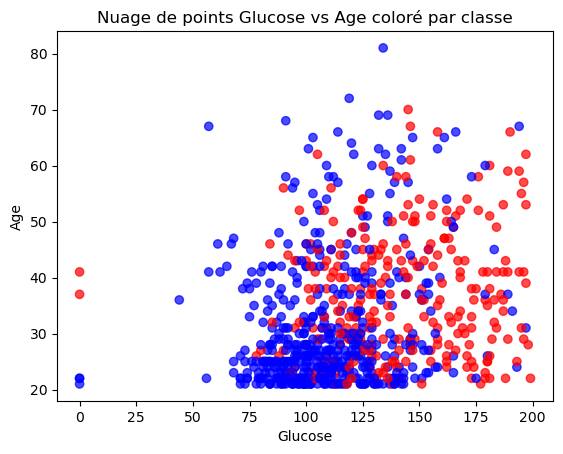

In [21]:
X = df["Glucose"]
Y = df["Age"]

plt.scatter(X, Y, c=df["Outcome"], cmap="bwr", alpha=0.7)
plt.xlabel("Glucose")
plt.ylabel("Age") 
plt.title("Nuage de points Glucose vs Age coloré par classe")
plt.show()

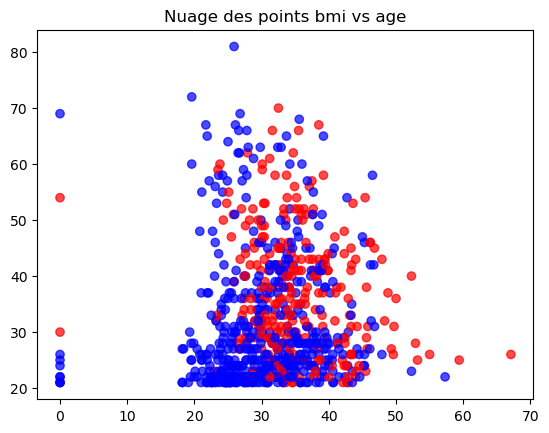

In [22]:
plt.scatter(df["BMI"], df["Age"], c=df["Outcome"], cmap="bwr", alpha=0.7)
plt.xlabel = ("bmi")
plt.ylabel = ("age")
plt.title("Nuage des points bmi vs age")
plt.show()


Les points sont répartis selon leur classe réelle

La frontière LDA représente l'hyperplan (ici une ligne) qui sépare les deux classes en minimisant la variance intra-classe et maximisant la variance inter-classe

Tout point situé d’un côté de la ligne est classé dans la classe 0, de l’autre côté dans la classe 1

In [23]:
# LDA construit une droite ou un hyperplan qui sépare au mieux les patients diabétiques (Outcome=1) des non-diabétiques (Outcome=0)
# Hypothèse : chaque classe suit une loi normale multivariée avec même matrice de covariance Σ
# Idée : séparer les classes avec une projection linéaire optimale

X = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin","BMI", "DiabetesPedigreeFunction", "Age"]]
Y = df["Outcome"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,Y_train)
clf.score(X_test, Y_test)

0.7316017316017316

In [24]:
# Hypothèse : chaque classe suit une loi normale multivariée, mais chaque classe a sa propre matrice de covariance Σ_k

clf_2 = QuadraticDiscriminantAnalysis()
clf_2.fit(X_train,Y_train) 
clf_2.score(X_test, Y_test) 

0.7662337662337663

In [25]:
# Les deux classifieurs
# lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
# qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

On suppose que :
- Les données de chaque classe suivent une loi normale multivariée :
\[
X \mid Y=k \sim \mathcal{N}(\mu_k, \Sigma), \quad k \in \{0,1\}
\]
- Les classes partagent la même matrice de covariance \(\Sigma\).

La **fonction discriminante linéaire** est :
\[
\delta_k(X) = X^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^T \Sigma^{-1} \mu_k + \ln(P(Y=k))
\]

Dans le cas binaire, on prédit la classe \(k\) qui maximise \(\delta_k(X)\).

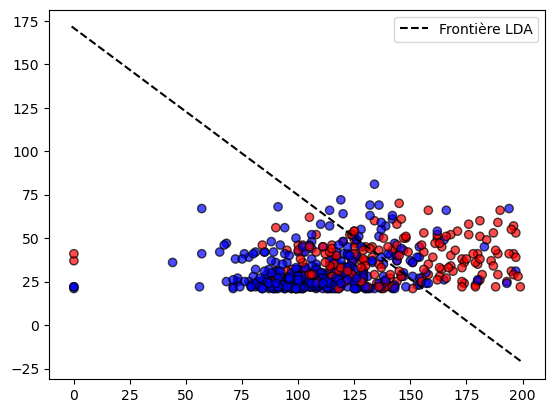

In [26]:
X = df[["Glucose","Age"]].values
Y = df["Outcome"].values

# Split (70% train / 30% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

# Coefficients
w1, w2 = lda.coef_[0]  # le modèle suit l'equation : w1*Glucose + w2*Age + b = 0
b = lda.intercept_[0]

# Droite de séparation
# génère une série de valeurs de glucose (axe horizontal)
# On réarrange l’équation de la frontière pour exprimer Age (x2) en fonction de Glucose (x1) 
x1_vals = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200) # X[:,0] toutes les lignes, première colonne → Glucose
x2_vals = - (w1/w2) * x1_vals - (b/w2)
# Cela permet de tracer la ligne de séparation entre les deux classes

# Tracé
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap="bwr", edgecolor="k", alpha=0.7)
plt.plot(x1_vals, x2_vals, 'k--', label="Frontière LDA")
plt.xlabel = "Glucose"
plt.ylabel = "Age"
plt.title = "Nuage de points et frontière LDA"
plt.legend()
plt.show()


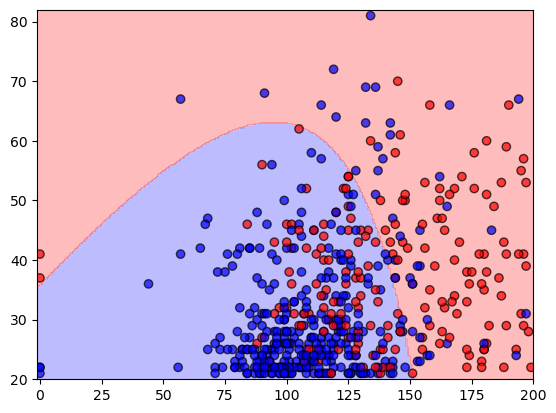

In [27]:
X = df[["Glucose", "Age"]].values
Y = df["Outcome"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# QDA 
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, Y_train)

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), # linspace crée 300 points uniformément espacés entre x_min et x_max 
                     np.linspace(y_min, y_max, 300)) # meshgrid crée une grille 2D avec toutes les combinaisons possibles de ces valeurs
                                                     # xx contient toutes les coordonnées x
                                                     # yy contient toutes les coordonnées y

Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])       # xx.ravel() → transforme la grille x en un vecteur 1D
                                                     # yy.ravel() → transforme la grille y en vecteur 1D
                                                     # np.c_[xx.ravel(), yy.ravel()] → concatène ces vecteurs colonne par colonne, 
                                                     # pour obtenir une matrice (N_points, 2)
                                                     # prédit la classe pour chaque point de la grille
Z = Z.reshape(xx.shape) # forme originale de la grille

plt.contourf(xx, yy, Z, alpha=0.3, cmap="bwr")  # zones de décision
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap="bwr", edgecolor="k", alpha=0.7)
plt.xlabel = "Glucose"
plt.ylabel = "Age"
plt.title = "Nuage de points et frontière QDA"
plt.show()

In [28]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


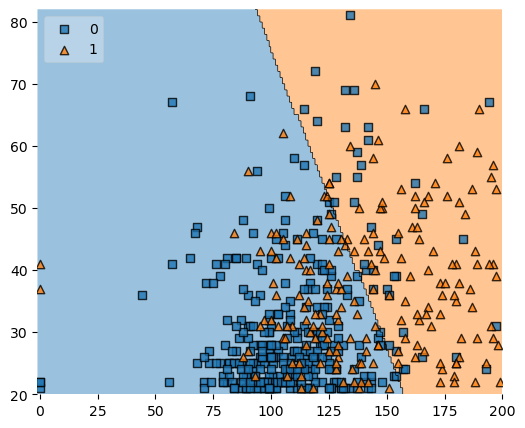

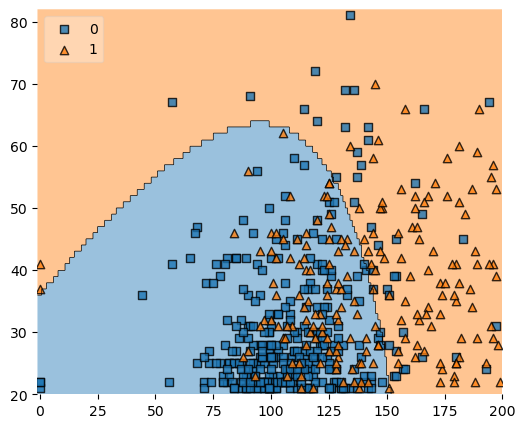

In [29]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis



# LDA
lda = LinearDiscriminantAnalysis().fit(X_train, Y_train)
plt.figure(figsize=(6,5))
plot_decision_regions(X_train, Y_train, clf=lda, legend=2)
plt.xlabel = "Glucose"
plt.ylabel = "Age"
plt.title = "Frontière LDA"
plt.show()

# QDA
qda = QuadraticDiscriminantAnalysis().fit(X_train, Y_train)
plt.figure(figsize=(6,5))
plot_decision_regions(X_train, Y_train, clf=qda, legend=2)
plt.xlabel = "Glucose"
plt.ylabel = "Age"
plt.title = "Frontière QDA"
plt.show()

In [30]:
y_pred1 = lda.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, y_pred1)

array([[130,  21],
       [ 40,  40]], dtype=int64)

In [31]:
y_pred2 = qda.predict(X_test)

confusion_matrix(Y_test, y_pred2)

array([[127,  24],
       [ 42,  38]], dtype=int64)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       151
           1       0.66      0.50      0.57        80

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.73       231



In [33]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       151
           1       0.61      0.47      0.54        80

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.66       231
weighted avg       0.70      0.71      0.70       231



In [34]:
import pandas as pd

# digitsX = pd.read_csv("digitsX.csv").drop(["Unnamed"], axis=1)
digitsX = pd.read_csv("digitsX.csv",index_col=0).values
digitsXt = pd.read_csv("digitsXt.csv",index_col=0).values
digitsY = pd.read_csv("digitsY.csv",index_col=0).values.ravel()
digitsYt = pd.read_csv("digitsYt.csv",index_col=0).values.ravel()

In [35]:
digitsX = digitsX[:,:784] # toutes les colonnes de 1 à V784
digitsXt = digitsXt[:,:784] # toutes les colonnes de 1 à V784

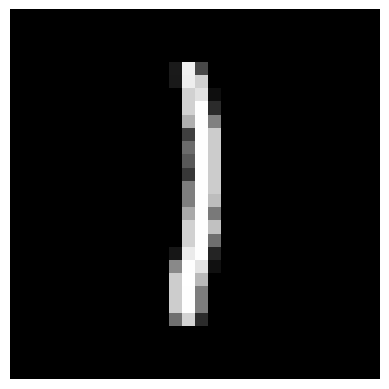

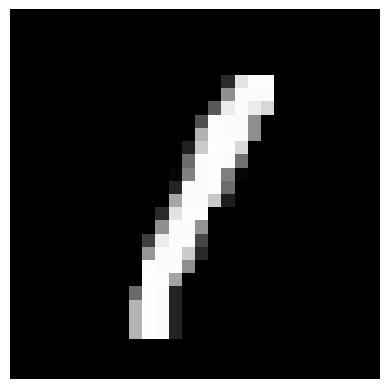

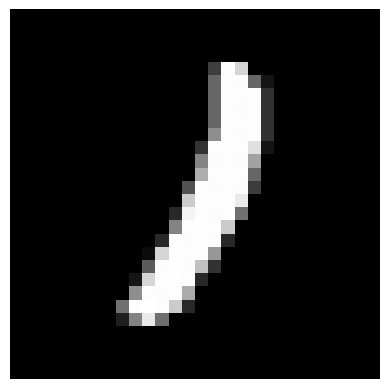

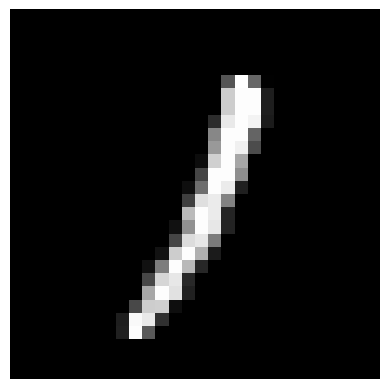

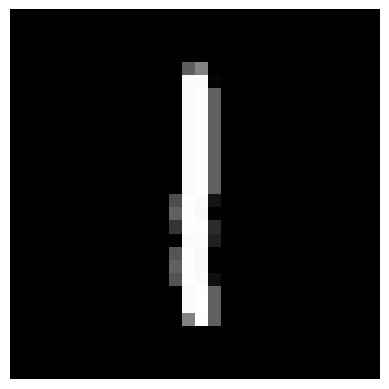

In [50]:
for i in range(10,15):
  plt.imshow(digitsX[i].reshape(28,28), cmap="gray")
  plt.axis("off")
  plt.show()

#for i in 

#digitsX[i].reshape(28,28)

#plt.gray()
#plt.matshow(digitsX[10]) 
#print(digitsX[10])
#plt.show() 

In [38]:
# acp 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

digitsX_c = StandardScaler().fit_transform(digitsX)

In [39]:
pca = PCA()
pca.fit(digitsX_c)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [40]:
print(pca.explained_variance_)
print(pca.explained_variance_.shape)

[5.03423334e+01 3.89573416e+01 2.89926624e+01 2.05242246e+01
 1.75023277e+01 1.57862974e+01 1.27548321e+01 1.17358687e+01
 1.06375959e+01 9.87376527e+00 8.84592833e+00 8.49990329e+00
 7.88228157e+00 7.56717447e+00 7.33706346e+00 6.75335553e+00
 6.48820729e+00 6.24119425e+00 6.03117563e+00 5.81376471e+00
 5.75468251e+00 5.39850230e+00 5.21157245e+00 5.05830932e+00
 4.69626874e+00 4.67038763e+00 4.43953464e+00 4.36600796e+00
 4.21713198e+00 4.10814376e+00 4.03699237e+00 3.96258952e+00
 3.86950937e+00 3.85944287e+00 3.72107025e+00 3.68536657e+00
 3.63912755e+00 3.53440502e+00 3.49749432e+00 3.41961435e+00
 3.26590925e+00 3.20819278e+00 3.13658087e+00 3.11069051e+00
 3.05240025e+00 3.01468787e+00 2.94121863e+00 2.88902651e+00
 2.85950217e+00 2.83144879e+00 2.69892830e+00 2.68414357e+00
 2.59422512e+00 2.52553351e+00 2.50787647e+00 2.44817613e+00
 2.43067897e+00 2.38651517e+00 2.33579026e+00 2.30326967e+00
 2.24246771e+00 2.23402728e+00 2.21010798e+00 2.14565778e+00
 2.11567905e+00 2.087465

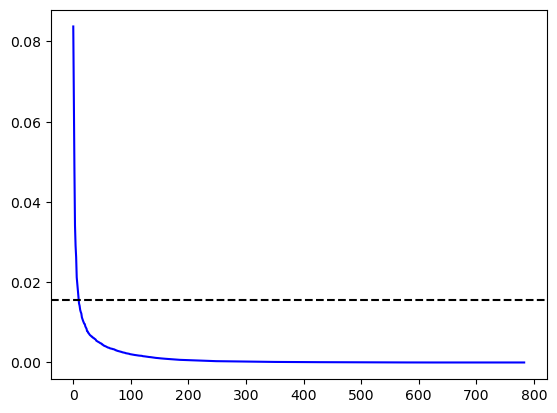

In [41]:
pca.explained_variance_.sum() # somme des éléements du vecteur contenant la variance expliquée par chaque composante principale
plt.plot(pca.explained_variance_ / pca.explained_variance_.sum() , 'b') 
plt.axhline(1/64, color='k', linestyle='--')
plt.show()

In [42]:
K=8
pca.explained_variance_[0:K].sum()/pca.explained_variance_.sum()  # les K premières composantes (ici 8)

F=pca.transform(digitsX) # projette les données originales (784 dimensions) dans l’espace des composantes principales 
F.shape, digitsX.shape # F = coordonnées d’un chiffre dans l’espace des composantes principales

((3000, 784), (3000, 784))

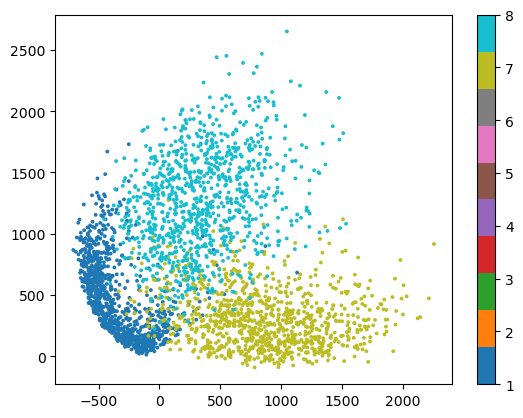

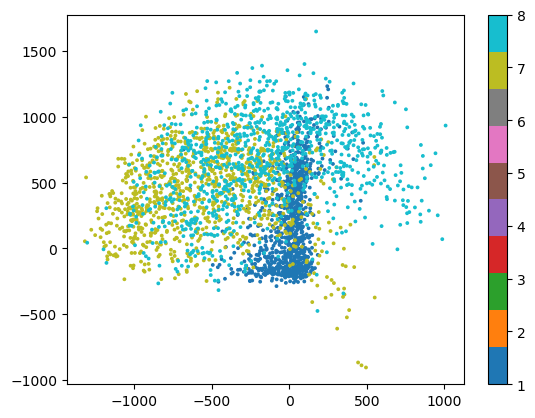

In [43]:
h = plt.scatter(F[:,0],F[:,1], c=digitsY, cmap=plt.get_cmap("tab10"), s=3) # coordonnées sur la 1ère et la 2ème composante principale
plt.colorbar()
plt.show()

h = plt.scatter(F[:,2],F[:,3], c=digitsY, cmap=plt.get_cmap("tab10"), s=3)
plt.colorbar()
plt.show()

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(digitsX, digitsY)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


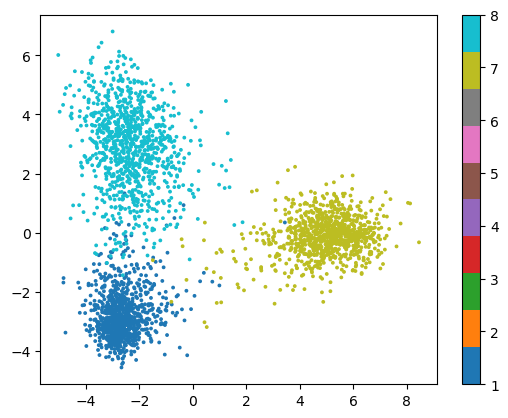

In [45]:
Flda = lda.transform(digitsX)

plt.scatter(Flda[:,0], Flda[:,1], c=digitsY, cmap=plt.get_cmap("tab10"), s=3)
plt.colorbar()
plt.xlabel = "LDA1"
plt.ylabel = "LDA2"
plt.title = "Projection LDA des chiffres"
plt.show()

PCA :

Le nuage dans le plan des deux premières composantes principales montre les points projetés selon la plus grande variance globale.

Les classes peuvent être mélangées, même si elles sont bien séparées dans les dimensions originales.

On voit souvent des chevauchements des classes.

LDA :

Le nuage dans le plan discriminant montre les points projetés selon les directions qui maximisent la séparation entre classes.

Les classes sont donc mieux séparées et les frontières sont plus nettes.

L’espace LDA est limité à C-1 dimensions (ici 2 pour 3 classes), donc toutes les informations discriminantes sont concentrées dans ces axes.

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = lda.predict(digitsXt)

In [47]:
accuracy = accuracy_score(digitsYt, y_pred)

In [48]:
print(accuracy)

0.9333333333333333
